part_1

In [ ]:
import numpy as np

array_zero = np.zeros(10)
print('zeros:', array_zero)

zeros: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
import numpy as np

array_one = np.ones(10)
print('ones:', array_one)

ones: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
import numpy as np

array_range = np.arange(start=10, stop=51)
print('range:', array_range)

range: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]


In [ ]:
import numpy as np

array_even_range = np.arange(start=10, stop=51, step=2)
print('evens:', array_even_range)

evens: [10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50]


In [ ]:
import numpy as np

matrix_identity = np.identity(3)
print('identity:', matrix_identity)

identity: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
import numpy as np

random_number = np.random.uniform(0, 1)
print('random:', random_number)

random: 0.049378447330867714


In [ ]:
import numpy as np

matrix_simple = np.arange(start=0, stop=1, step=0.111111111)
print('matrix:', matrix_simple)

matrix: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555555
 0.66666667 0.77777778 0.88888889 1.        ]


part_2

In [ ]:
import numpy as np

random_matrix = np.random.randint(10, size=20)
print(random_matrix)

[2 1 3 9 9 6 6 5 8 0 8 2 9 6 2 8 5 2 0 0]


In [ ]:
import numpy as np

matrix_from_array = np.arange(0,12).reshape((4, 3))
print(matrix_from_array)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [ ]:
import numpy as np

def	pure_range(n):
	return np.arange(start=0, stop=1+1/(n-1), step=1/(n-1))

print(pure_range(5))

[0.   0.25 0.5  0.75 1.  ]


In [ ]:
import numpy as np

big_matrix = np.arange(0,120).reshape((10, 12))
sub_matrix = big_matrix[0:4,8:12]
print(big_matrix)
print(sub_matrix)

[[  0   1   2   3   4   5   6   7   8   9  10  11]
 [ 12  13  14  15  16  17  18  19  20  21  22  23]
 [ 24  25  26  27  28  29  30  31  32  33  34  35]
 [ 36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69  70  71]
 [ 72  73  74  75  76  77  78  79  80  81  82  83]
 [ 84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107]
 [108 109 110 111 112 113 114 115 116 117 118 119]]
[[ 8  9 10 11]
 [20 21 22 23]
 [32 33 34 35]
 [44 45 46 47]]


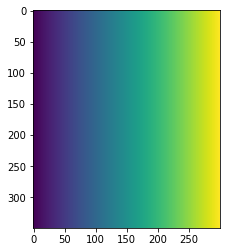

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def	pure_range(n):
	return np.arange(start=0, stop=1+1/(n-1), step=1/(n-1))

def	gen_binded_matrix(n, m):
	return np.concatenate([pure_range(n) for i in range(m)]).reshape((m, n))

binded_matrix = gen_binded_matrix(300, 350)

plt.imshow(binded_matrix)
plt.show()

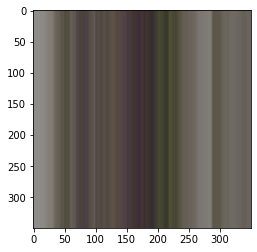

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def	pure_range(n):
	return np.arange(start=0, stop=1+1/(n-1), step=1/(n-1))

def	gen_binded_matrix(n, m):
	return np.concatenate([pure_range(n) for i in range(m)]).reshape((m, n))

binded_matrix = gen_binded_matrix(300, 350)

img_matrix = plt.imread("/content/flowers.jpg")
matrix_mul = np.dot(1/(255 * 255), np.dot(binded_matrix, img_matrix))

plt.imshow(matrix_mul)
plt.show()

bonus

In [ ]:
# download img
import requests

url = "https://github.com/jelenamikan/opencv-project/blob/master/flowers.jpg?raw=true"
res = requests.get(url)
content = res.content
with open("flowers.jpg", "wb") as f:
  f.write(content)

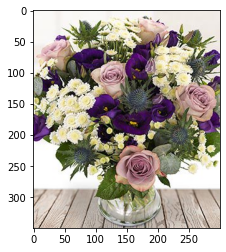

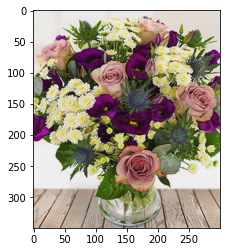

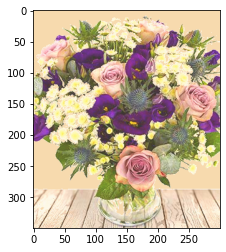

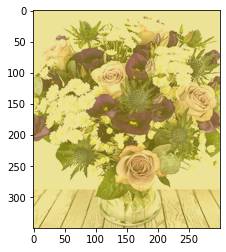

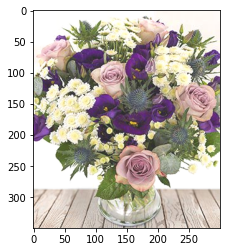

In [ ]:
# you need to download the image

import matplotlib.pyplot as plt
import numpy as np
import cv2

def	hue_saturation(img_rgb, alpha=1, beta=1):
	img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
	hue = img_hsv[:,:,0]
	saturation = img_hsv[:,:,1]
	hue = np.clip(hue * alpha, 0, 179)
	saturation = np.clip(saturation * beta, 0, 255)
	img_hsv[:,:,0] = hue
	img_hsv[:,:,1] = saturation
	return cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

def	brightness_contrast(img, alpha=1.0, beta=0):
	img_contrast = img * (alpha)
	img_bright = img_contrast + (beta)
	img_bright = np.clip(img_bright, 0, 255)
	img_bright = img_bright.astype(np.uint8)
	return img_bright

def	grayscale(img):
	return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def	vignette(img, r, g, b, a):
	color = img.copy()
	color[:,:,0] = b
	color[:,:,1] = g
	color[:,:,2] = r
	return cv2.addWeighted(img, 1-a, color, a, 0)

def replace_color(img, hl=0, sl=0, vl=0, hu=0, su=0, vu=0, nred=0, ngreen=0, nblue=0):
	rows, cols = img.shape[:2]
	hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
	lower = np.array([hl, sl, vl])
	upper = np.array([hu, su, vu])
	color = cv2.inRange(hsv, lower, upper)
	img[color>0] = (nblue, ngreen, nred)
	return img



def	amaro_filter(img, hue=1.1, saturation=1.5, contrast=0.9, brightness=10):
	img = hue_saturation(img, hue, saturation)
	img = brightness_contrast(img, contrast, brightness)
	return img

def	nashville_filter(img, hue=1, saturation=1.5, contrast=1.2, brightness=10):
	img = hue_saturation(img, hue, saturation)
	img = brightness_contrast(img, contrast, brightness)
	img = replace_color(img,0,0,0,0,0,30,34,43,109)
	img = replace_color(img,0,0,200,0,0,255,247,218,174)
	img = vignette(img,247,218,174,0.2)
	return img

def toaster_filter(img, hue=1, saturation=0.9, contrast=1.4, brightness=-20):
	img = replace_color(img,0,0,0,0,0,128,51,0,0)
	img = replace_color(img,150,255,50,170,255,128,51,0,0)
	img = hue_saturation(img, hue, saturation)
	img = brightness_contrast(img, contrast, brightness)
	img = vignette(img,128,128,128,0.2)
	img = vignette(img,255,99,66,0.1)
	img = vignette(img,250,250,0,0.3)
	return img

def hudson_filter(img, hue=1, saturation=1.1, contrast=0.9, brightness=40):
	img = hue_saturation(img, hue, saturation)
	img = brightness_contrast(img, contrast, brightness)
	return img

# original
im = cv2.imread("/content/flowers.jpg")
plt.imshow(im[:,:,::-1])
plt.show()
# amaro
im = cv2.imread("/content/flowers.jpg")
img = amaro_filter(im)
plt.imshow(img[:,:,::-1])
plt.show()
# nashville
im = cv2.imread("/content/flowers.jpg")
img = nashville_filter(im)
plt.imshow(img[:,:,::-1])
plt.show()
# toaster
im = cv2.imread("/content/flowers.jpg")
img = toaster_filter(im)
plt.imshow(img[:,:,::-1])
plt.show()
# hudson
im = cv2.imread("/content/flowers.jpg")
img = hudson_filter(im)
plt.imshow(img[:,:,::-1])
plt.show()

neurobonus

True positives:  2 
True negatives:  4 
False positives:  0 
False negatives:  0 
Accuracy:  1.0


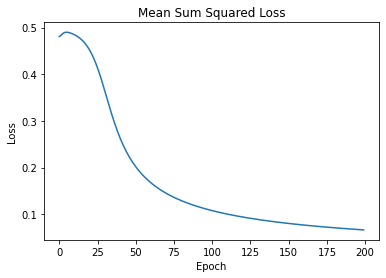

In [ ]:
# actually not very much code of mine:
# https://github.com/cverdence/simplennet

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 6 samples formed by 3 inputs
input_train = np.array([[0,1,0],[0,1,1],[0,0,0],[10,0,0],[10,1,1],[10,0,1]])
output_train = np.array([[0],[0],[0],[1],[1],[1]])
input_pred = np.array([1,1,0])

# test samples for the network
input_test = np.array([[1,1,1],[10,0,1],[0,1,10],[10,1,10],[0,0,0],[0,1,1]])
output_test = np.array([[0],[1],[0],[1],[0],[0]])

# we nedd to scale inputs and outputs because otherwise 
# the network can mismatch the values between inputs
scaler = MinMaxScaler()
input_train_scaled = scaler.fit_transform(input_train)
output_train_scaled = scaler.fit_transform(output_train)
input_test_scaled = scaler.fit_transform(input_test)
output_test_scaled = scaler.fit_transform(output_test)

class NeuralNetwork():
  def __init__(self, ):
    # number of input nodes
    self.inputSize = 3
    # number of output nodes
    self.outputSize = 1
    # number of inermediate nodes
    self.hiddenSize = 3

    # adding weights
    self.W1 = np.random.rand(self.inputSize, self.hiddenSize)
    self.W2 = np.random.rand(self.hiddenSize, self.outputSize)

    # error list
    self.error_list = []
    # setting limit to select the good outputs
    self.limit = 0.5
    # various outpus
    self.true_positives = 0
    self.false_positives = 0
    self.true_negatives = 0
    self.false_negatives = 0

  # preview of the future propagation
  def forward(self, X):
    # forwards the first weight
    self.z = np.matmul(X, self.W1)
    self.z2 = self.sigmoid(self.z)
    # forwards the second weight
    self.z3 = np.matmul(self.z2, self.W2)
    o = self.sigmoid(self.z3)
    return o

  # statistic sigmoids
  def sigmoid(self, s):
    return 1 / (1 + np.exp(-s))
  def sigmoidPrime(self, s):
    return s * (1 - s)

  # it adjusts the wiìeights of the network in order to reduce the error
  def backward(self, X, y, o):
   # getting the error of the first weight
    self.o_error = y - o
    #using error to balance the second weight
    self.o_delta = self.o_error * self.sigmoidPrime(o)
    # getting the error of the second weight
    self.z2_error = np.matmul(self.o_delta, np.matrix.transpose(self.W2))
    # using error to balance the first weight
    self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
    # weigths adjustment
    self.W1 += np.matmul(np.matrix.transpose(X), self.z2_delta)
    self.W2 += np.matmul(np.matrix.transpose(self.z2), self.o_delta)

  # it goes forward and backword in order to balance the weights
  def train(self, X, y, epochs):
    for epoch in range(epochs):
      # every loop tries balace the weights on the network
      o = self.forward(X)
      self.backward(X, y, o)
      self.error_list.append(np.abs(self.o_error).mean())

  # predicts the output
  def predict(self, x_predicted):
    return self.forward(x_predicted).item()

  # plots the error developement
  def view_error_development(self):
    plt.plot(range(len(self.error_list)), self.error_list)
    plt.title('Mean Sum Squared Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

  # calculate the accuracy and its components
  def test_evaluation(self, input_test, output_test):
    for i, test_element in enumerate(input_test):
      # validates the outpus
      if self.predict(test_element) > self.limit and output_test[i] == 1:
        self.true_positives += 1
      if self.predict(test_element) < self.limit and output_test[i] == 1:
        self.false_negatives += 1
      if self.predict(test_element) > self.limit and output_test[i] == 0:
        self.false_positives += 1
      if self.predict(test_element) < self.limit and output_test[i] == 0:
        self.true_negatives += 1
    print('True positives: ', self.true_positives, '\nTrue negatives: ', self.true_negatives,
        '\nFalse positives: ', self.false_positives, '\nFalse negatives: ', self.false_negatives,
        '\nAccuracy: ', (self.true_positives + self.true_negatives) /
        (self.true_positives + self.true_negatives + self.false_positives + self.false_negatives))

def main():
  # creates the neural network
  NN = NeuralNetwork()
  # trains the NN with 200 epochs
  NN.train(input_train_scaled, output_train_scaled, 200)
  # predicts the NN output
  NN.predict(input_pred)
  # plots the error
  NN.view_error_development()
  # test the NN
  NN.test_evaluation(input_test_scaled, output_test_scaled)
  plt.show()

if __name__ == '__main__':
  main()